# Machine Learning Algorithms

Going to provide an overview of the most common machine learning algorithms.

You should feel comfortable with:

- Jupyter Notebooks
- Python


# Clustering

## K-means clustering
 
K-means clustering is an unsupervised learning algorithm that classifies a data point based on the majority of its neighbors. 

The algorithm is as follows:

- Choose the number of $k$ and a distance metric.
- Find the $k$ nearest neighbors of the sample that we want to classify.
- Assign the class label by majority vote.
- Update the centroids of each class.
- Repeat the steps above until convergence.

Note that because this algorithm takes distance into account, it is important that the features (columns) are on the same scale. For the iris dataset, they are but for other datasets, you may need to scale the features.

Text(0.5, 1.0, 'Original Data')

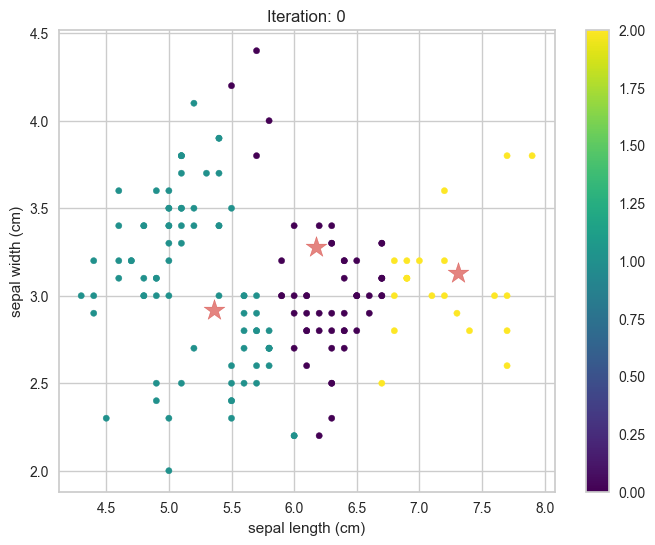

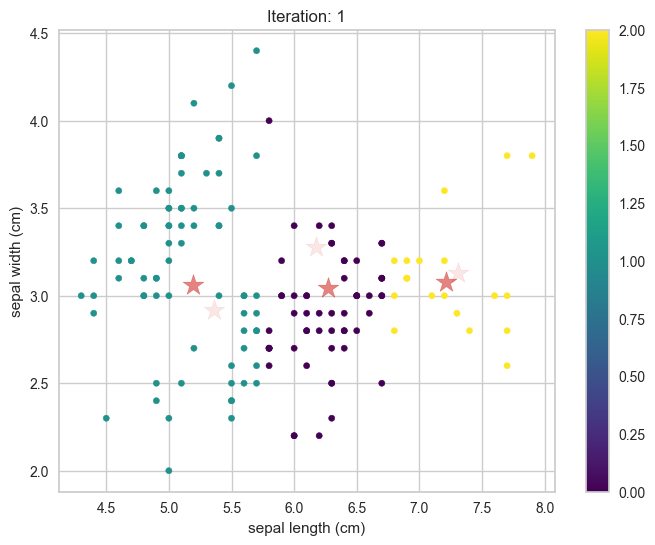

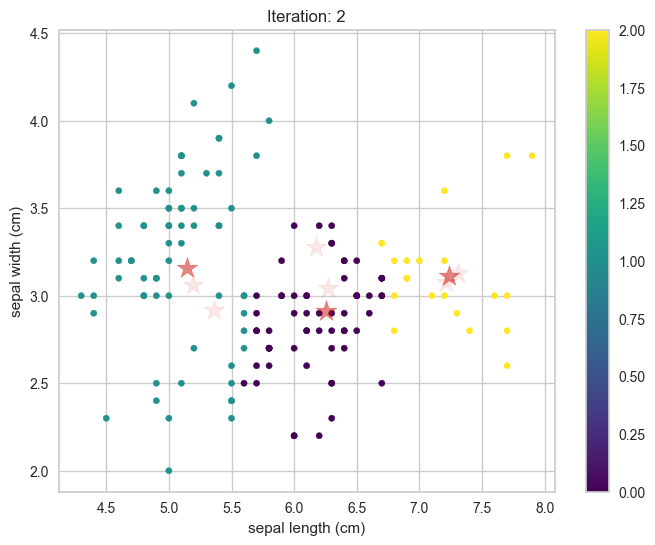

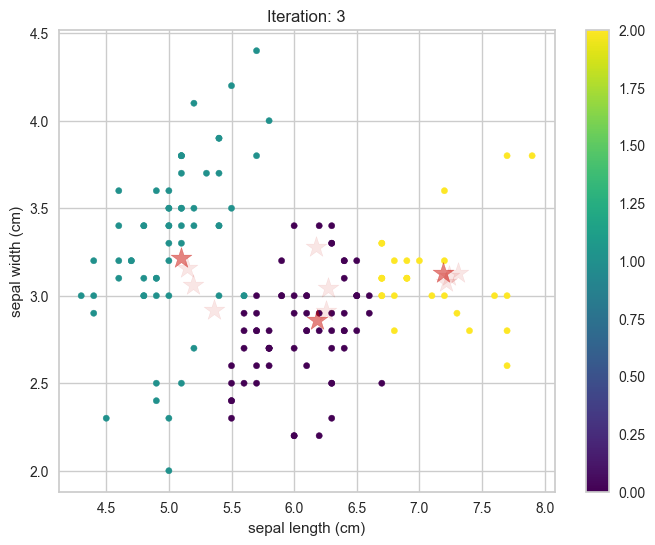

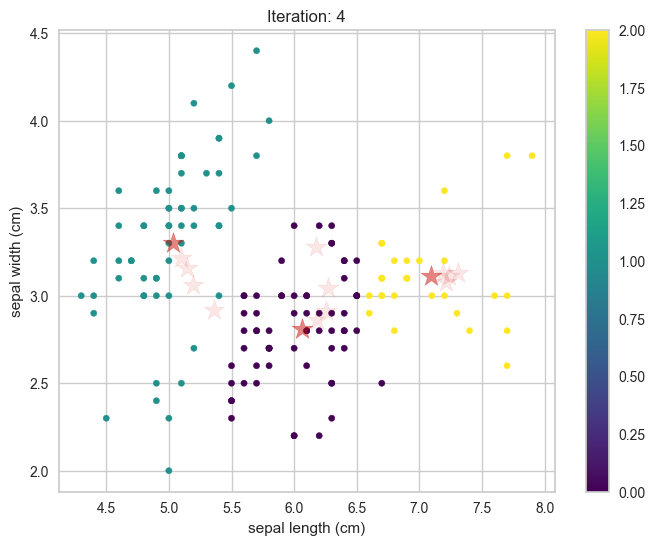

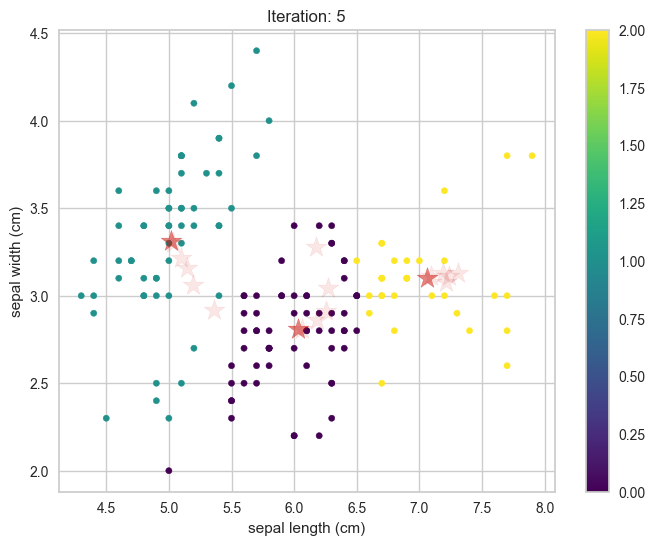

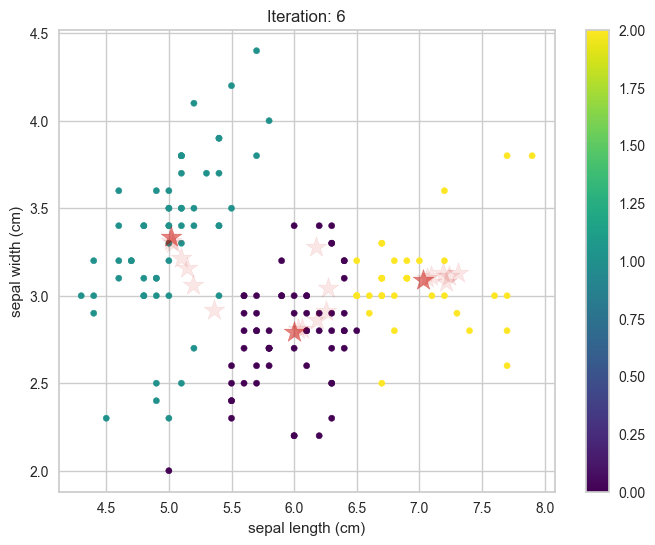

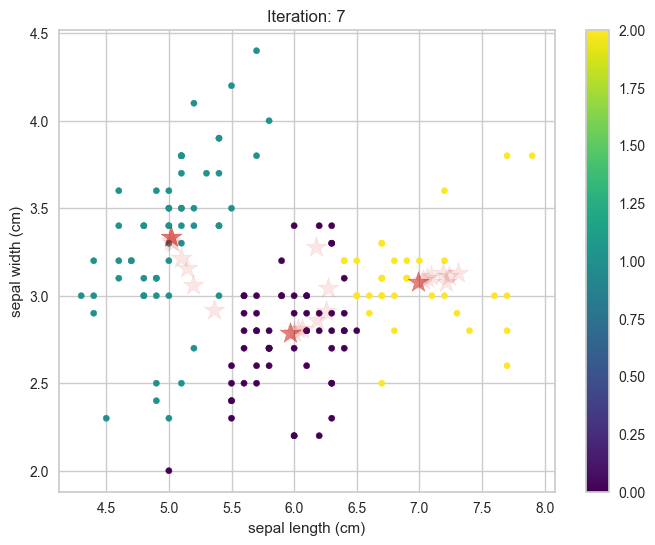

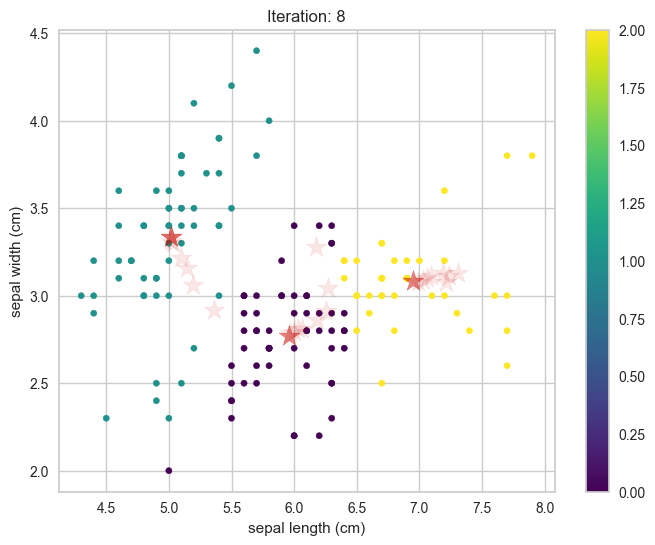

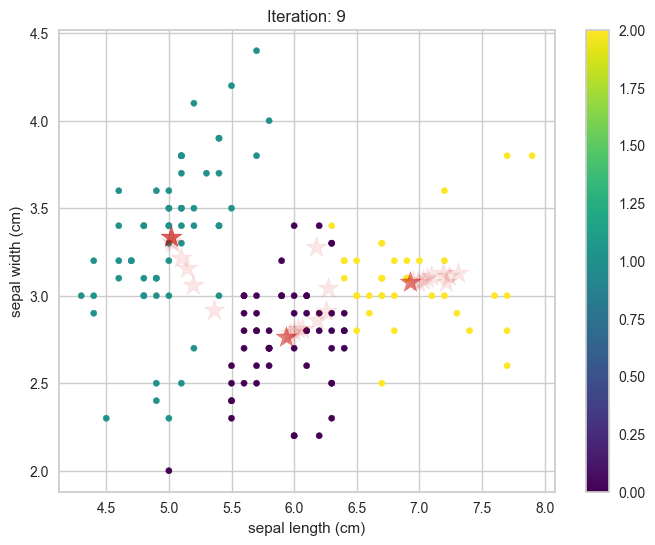

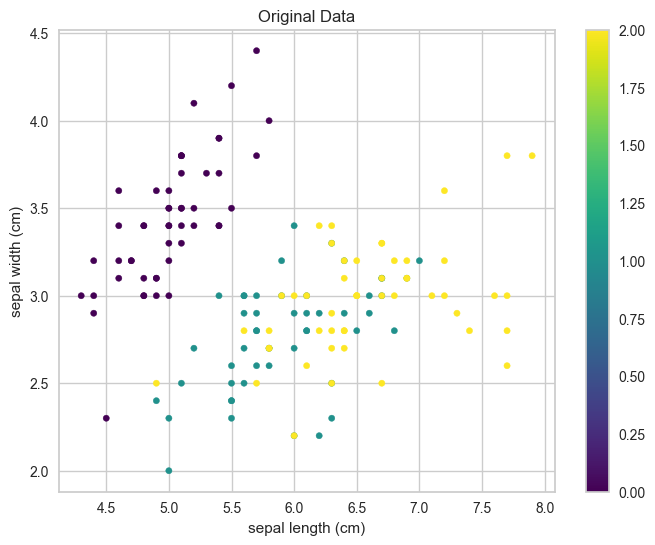

In [6]:


from sklearn.cluster import KMeans
import sklearn.datasets
import matplotlib.pyplot as plt

dataset = sklearn.datasets.load_iris(as_frame=True)

import pandas as pd

# Load dataset
dataset = sklearn.datasets.load_iris(as_frame=True)
X = dataset['data'].loc[:, ['sepal length (cm)', 'sepal width (cm)']]
y = dataset['target']

# demonstration of k-means clustering with iris dataset
# keep list of all centroids
centroids = []

# loop over a few iterations and plot the results
for i in range(10):
    model = KMeans(n_clusters=3, init='random', n_init=1,
                    max_iter=i+1, random_state=42)
    model.fit(X)
    label = model.predict(X)
    # plot the input data color by cluster
    fig, ax = plt.subplots(figsize=(8, 6))
    X.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c=label, cmap='viridis', ax=ax)
    # plot the centers
    centers = model.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], marker='*', s=250, color='r', alpha=.5)
    ax.set_title('Iteration: ' + str(i))
    # plot previous centroids with reduced alpha value
    if i > 0:
        for centroid in centroids:
            ax.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=250, color='r', alpha=.1)
    # save the current centroids
    centroids.append(model.cluster_centers_)
    
  
  # plot the original data color by target
fig, ax = plt.subplots(figsize=(8, 6))
X.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c=y, cmap='viridis', ax=ax)
ax.set_title('Original Data')


## K Evaluation for K-means

We specify the K value for K-means clustering. However, we do not know the best K value for a given dataset. 

There are a few methods to evaluate the K value for K-means clustering:

- Elbow method - Track the "inertia" of the model as the K value increases. The inertia is the sum of squared distances of samples to their closest cluster center. 
- Silhouette coefficient - The silhouette coefficient is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette coefficient ranges from -1 to 1. 

Text(0.5, 1.0, 'Elbow Method')

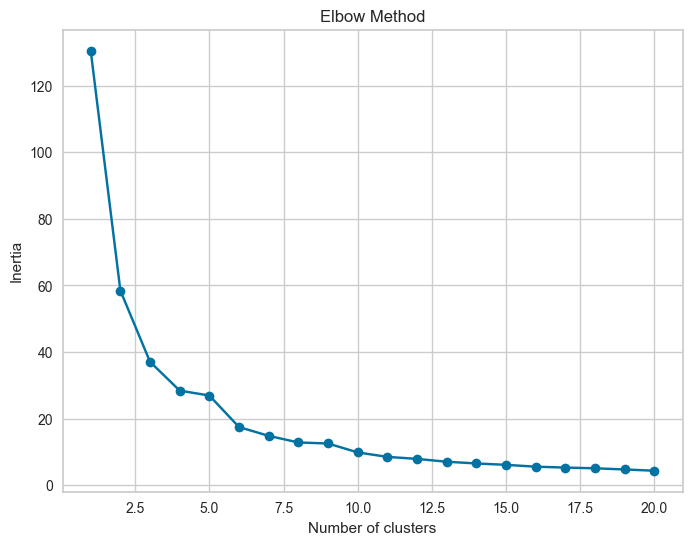

In [7]:
# Run elbow method to find optimal number of clusters

inertias = []
max_clusters = 20
for i in range(max_clusters):
    km = KMeans(n_clusters=i+1, n_init='auto',
                max_iter=300, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

# plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, max_clusters+1), inertias, marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
ax.set_title('Elbow Method')


In [10]:
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

In [11]:
# list matplotlib fonts available
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')


['/System/Library/Fonts/Supplemental/NotoSansImperialAramaic-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Telugu MN.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansBrahmi-Regular.ttf',
 '/System/Library/Fonts/ヒラギノ角ゴシック W8.ttc',
 '/System/Library/Fonts/Supplemental/Nadeem.ttc',
 '/System/Library/Fonts/Supplemental/Malayalam MN.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansBhaiksuki-Regular.ttf',
 '/System/Library/Fonts/Hiragino Sans GB.ttc',
 '/System/Library/Fonts/Supplemental/ChalkboardSE.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansOldHungarian-Regular.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf',
 '/Users/alexparsee/Library/Fonts/Space Mono Bold Italic for Powerline.ttf',
 '/System/Library/Fonts/Supplemental/NotoSerifNyiakengPuachueHmong-Regular.ttf',
 '/Users/alexparsee/Library/Fonts/Monofur Italic for Powerline.ttf',
 '/Users/alexparsee/Library/Fonts/Meslo LG M Regular for Powerline.ttf',
 '/Users/alexparsee/Library/Fonts/Meslo 

In [12]:
# if on linux, set matplotlib font to DejaVuSans
# get rid of warnings in next cell
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'


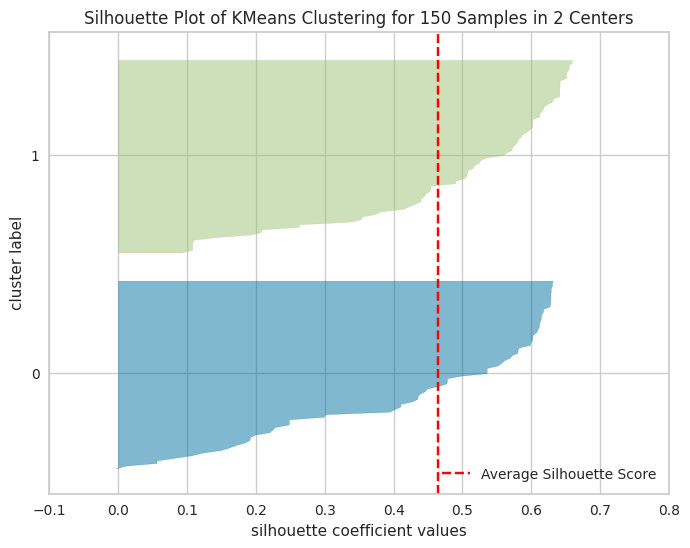

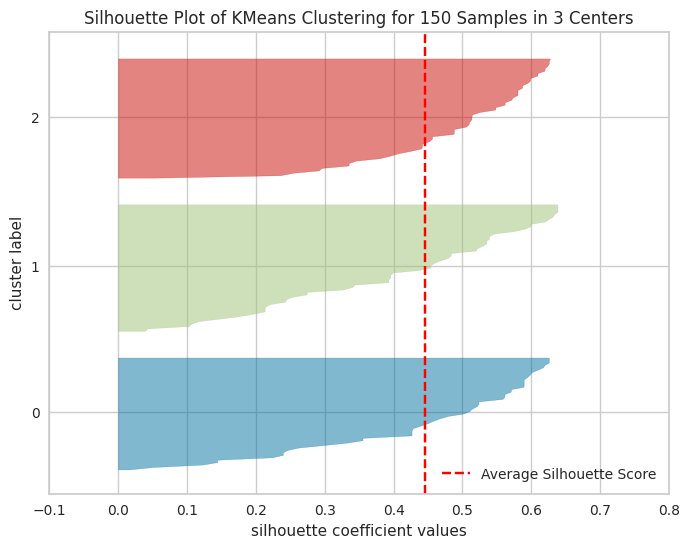

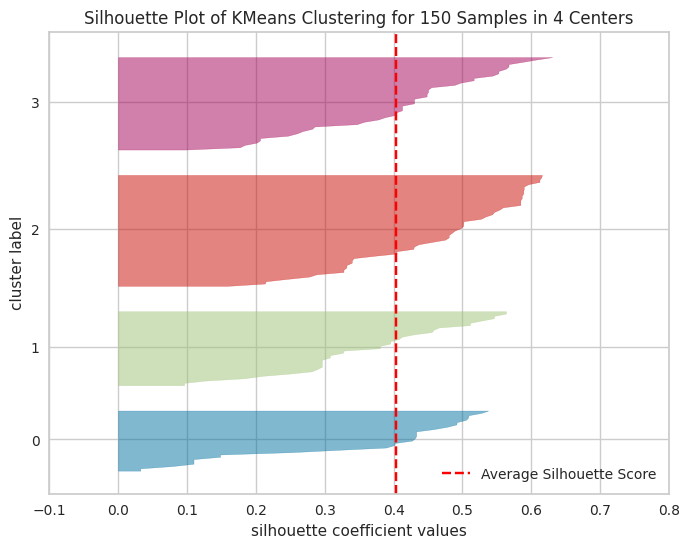

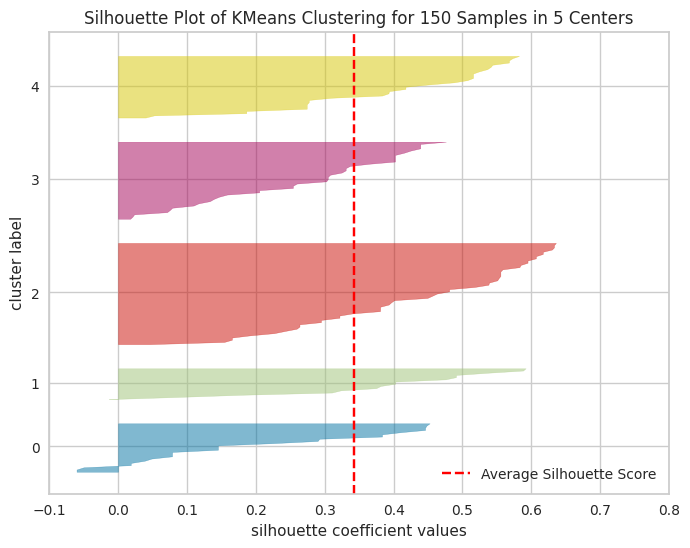

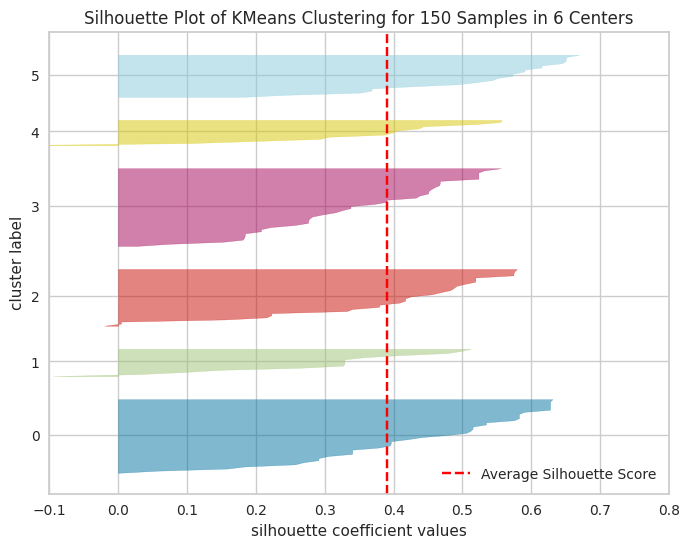

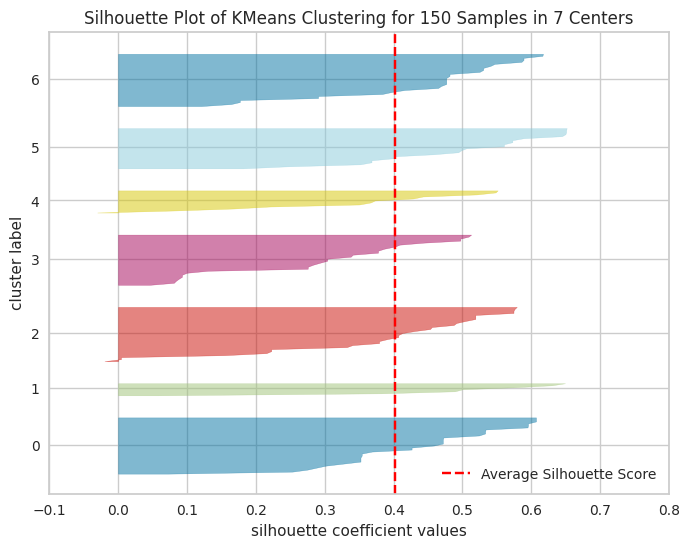

In [13]:
# Run silhouette method to find optimal number of clusters
from yellowbrick.cluster import silhouette_visualizer 

max_clusters = 6
for i in range(max_clusters):
    km = KMeans(n_clusters=i+2, n_init='auto',
                max_iter=300, random_state=42)

    fig, ax = plt.subplots(figsize=(8, 6))
    # setting show=False so we can set xlim to same value for all plots
    viz = silhouette_visualizer(km, X, colors='yellowbrick', ax=ax, show=False)
    ax.set_xlim([-0.1, .8])    



## Understanding Clustering Results

We can use the following methods to understand the clustering results:

- Create a surrogate model to predict the cluster label for a given sample.
- Summarize the cluster by the mean of each feature.
- Visualize the clustering results in 2D or 3D.

In [14]:
!pip install datasets

In [15]:
# going to cluster electricity data from Australia
# https://www.openml.org/search?type=data&sort=runs&id=151&status=active
from datasets import load_dataset
electricity = load_dataset('inria-soda/tabular-benchmark', data_files='clf_num/electricity.csv')

/Users/alexparsee/.pyenv/versions/3.11.4/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
electricity

DatasetDict({
    train: Dataset({
        features: ['date', 'period', 'nswprice', 'nswdemand', 'vicprice', 'vicdemand', 'transfer', 'class'],
        num_rows: 38474
    })
})

In [17]:
print(dir(electricity['train']))

['_TF_DATASET_REFS', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getitems__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_build_local_temp_path', '_check_index_is_initialized', '_data', '_estimate_nbytes', '_fingerprint', '_format_columns', '_format_kwargs', '_format_type', '_generate_tables_from_cache_file', '_generate_tables_from_shards', '_get_cache_file_path', '_get_output_signature', '_getitem', '_indexes', '_indices', '_info', '_map_single', '_new_dataset_with_indices', '_output_all_columns', '_push_parquet_shards_to_hub', '_save_to_disk_single', '_select_contiguous', '_select_with_indices_mapping', '_split', 'add_colum

In [18]:
elec = electricity['train'].to_pandas()
elec

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.898987,0.957447,0.068632,0.568283,0.004456,0.456499,0.644737,DOWN
1,0.867616,0.234043,0.033716,0.337102,0.001672,0.329622,0.846930,DOWN
2,0.009159,0.255319,0.059175,0.185808,0.003467,0.422915,0.414912,DOWN
3,0.898987,0.531915,0.087577,0.539572,0.004936,0.637752,0.491667,DOWN
4,0.868280,0.085106,0.027021,0.165129,0.001271,0.265924,0.748246,DOWN
...,...,...,...,...,...,...,...,...
38469,0.915800,0.404255,0.077549,0.456263,0.005332,0.378560,0.356140,UP
38470,0.915800,0.425532,0.074397,0.444213,0.005110,0.377525,0.369737,UP
38471,0.915800,0.468085,0.072835,0.423386,0.005019,0.354480,0.380263,UP
38472,0.915800,0.829787,0.065420,0.353913,0.004508,0.319524,0.319737,UP


In [19]:
X = elec.drop(columns=['class'])

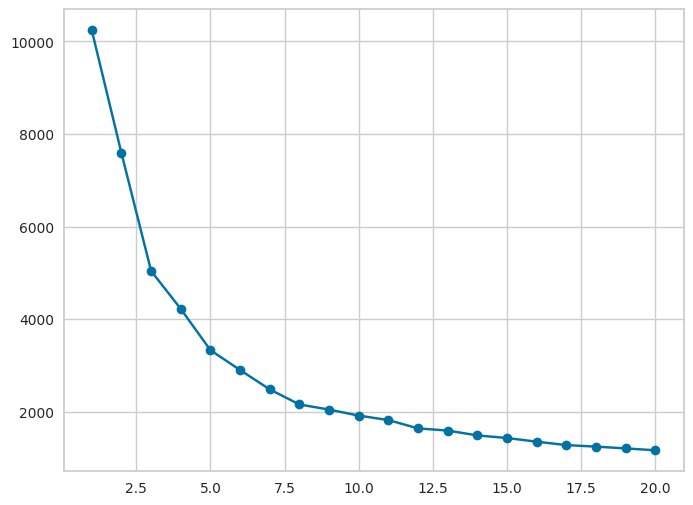

In [20]:
# get inertias for different numbers of clusters
inertias = []
max_clusters = 20
for i in range(max_clusters):
    km = KMeans(n_clusters=i+1, n_init='auto',
                max_iter=300, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

# plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, max_clusters+1), inertias, marker='o')

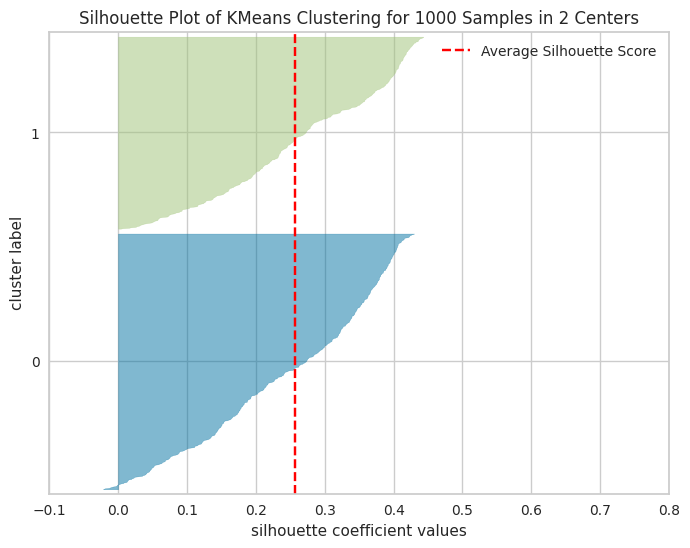

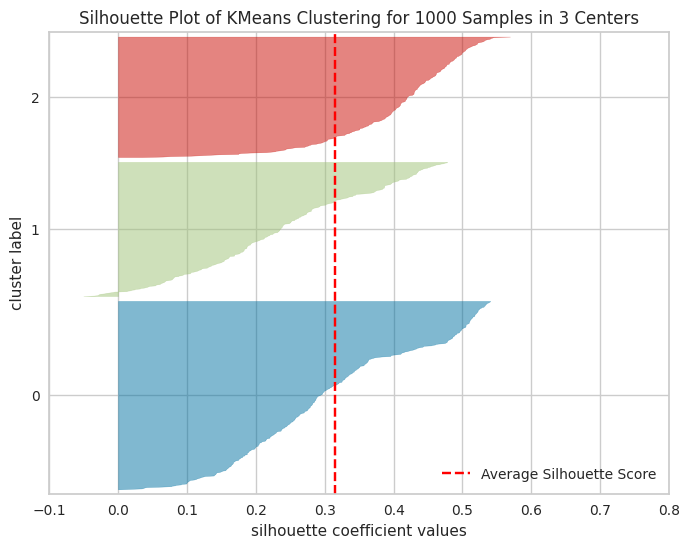

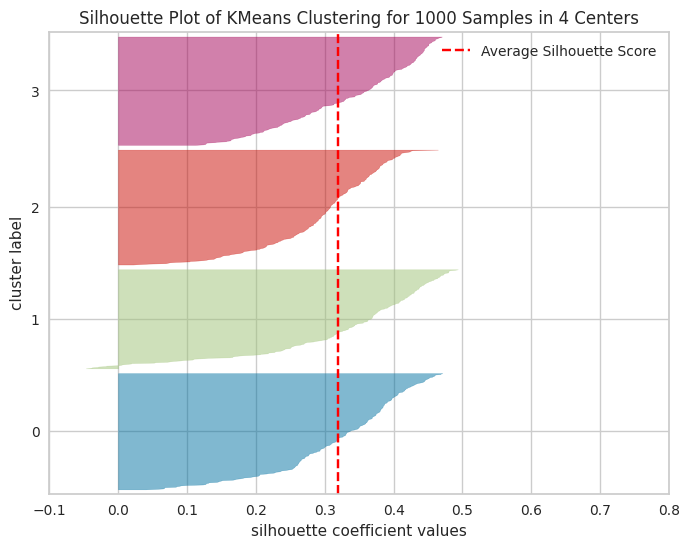

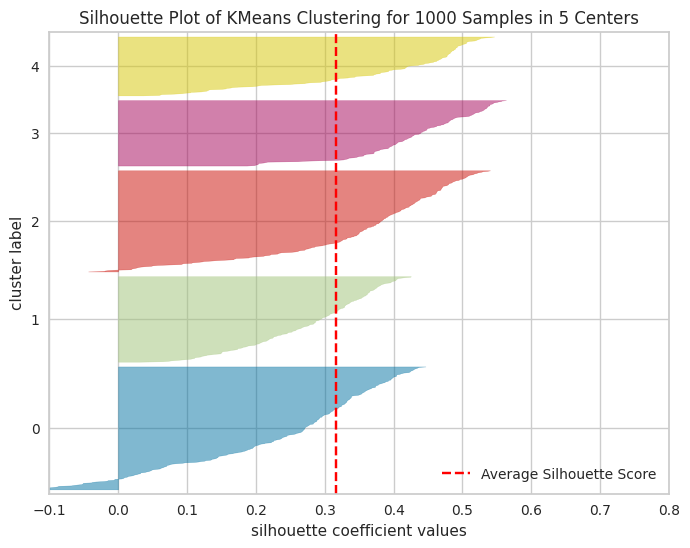

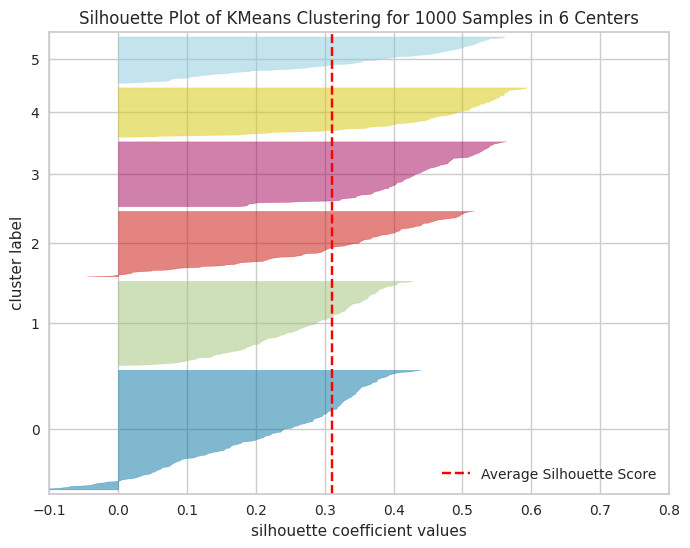

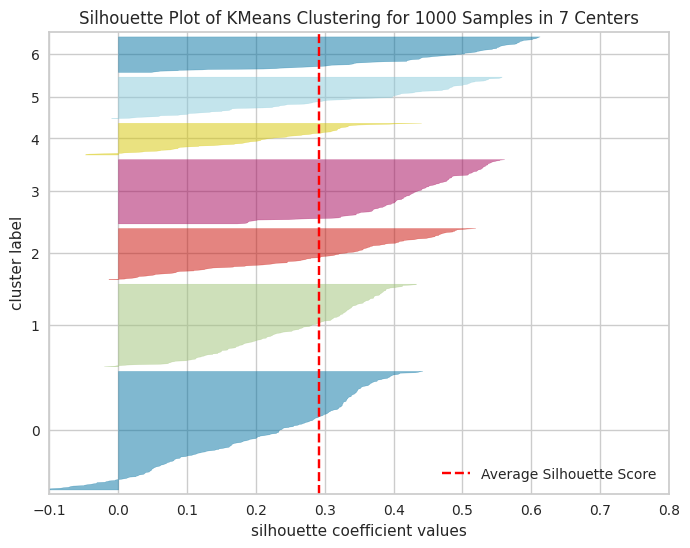

In [21]:
# Takes 2min 20s w/o sampling
# get silhouette scores for different numbers of clusters
from yellowbrick.cluster import silhouette_visualizer

max_clusters = 6
for i in range(max_clusters):
    km = KMeans(n_clusters=i+2, n_init='auto',
                max_iter=300, random_state=42)

    fig, ax = plt.subplots(figsize=(8, 6))
    # setting show=False so we can set xlim to same value for all plots
    viz = silhouette_visualizer(km, X.sample(1_000, random_state=42), colors='yellowbrick', ax=ax, show=False)
    ax.set_xlim([-0.1, .8])

In [22]:
!pip install Jinja2

In [23]:
# going to choose 5 clusters (if 5, 6, or 7 are all close, choose the simpler model)
# summarize the results by group

km = KMeans(n_clusters=5, n_init='auto',
            max_iter=300, random_state=42)
km.fit(X)
label = km.predict(X)
(elec
 .assign(cluster=label)
 .groupby('cluster')
 .agg('mean', numeric_only=True)
 .T
 .style
 .background_gradient(cmap='RdBu', axis='columns')
)

cluster,0,1,2,3,4
date,0.887881,0.449859,0.289463,0.016236,0.892885
period,0.206473,0.671091,0.163150,0.652753,0.678055
nswprice,0.045310,0.059600,0.050946,0.078439,0.063094
nswdemand,0.310528,0.499305,0.276622,0.484675,0.529125
vicprice,0.002687,0.004014,0.002967,0.003467,0.004172
vicdemand,0.327880,0.447320,0.376267,0.422915,0.510550
transfer,0.679200,0.461236,0.484567,0.414912,0.509617


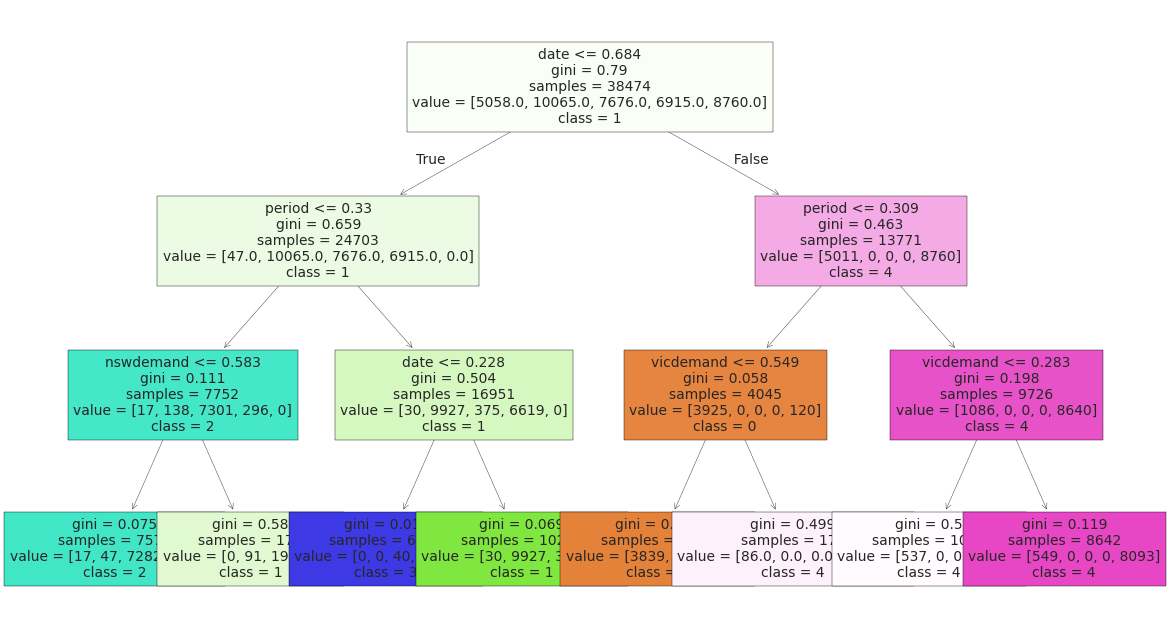

In [24]:
# Summarize by surrogate model decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X, label)
# plot the tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(14, 8))
# make string for class names
class_names = [str(i) for i in range(0, 5)]
_ = plot_tree(dt, ax=ax, feature_names=X.columns, class_names=class_names, filled=True, fontsize=10)


## Other Clustering Algorithms

- Hierarchical clustering - This clusters by distance. It first clusters the two closest points, then clusters the next closest point to the first cluster, and so on. It is not as efficient as k-means, but it does not require you to specify the number of clusters. It is also more robust to outliers than k-means.
- DBSCAN -  This clusters by density. It finds the densest region of points and clusters them together. It is also more robust to outliers than k-means.


## Challenge: K-means Clustering

With the Titanic dataset:
- drop the missing values
- drop the categorical features
- scale the features
- run K-means clustering
- use the elbow method to find the best K value

## Solution: K-means Clustering


# PCA

## Intro to PCA

Principal component analysis (PCA) is a dimensionality reduction technique. It finds the linear combinations of the features that explain the most variance in the data.


In [25]:
from sklearn.cluster import KMeans
import sklearn.datasets
import matplotlib.pyplot as plt

dataset = sklearn.datasets.load_iris(as_frame=True)

X = (dataset
     ['data']
     .loc[:, ['sepal length (cm)', 'sepal width (cm)']]
)
y = dataset['target']

In [26]:
X

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [27]:
X_pca = pca.transform(X)

X_pca

NameError: name 'pca' is not defined

Text(0.5, 1.0, 'PCA on Iris Data')

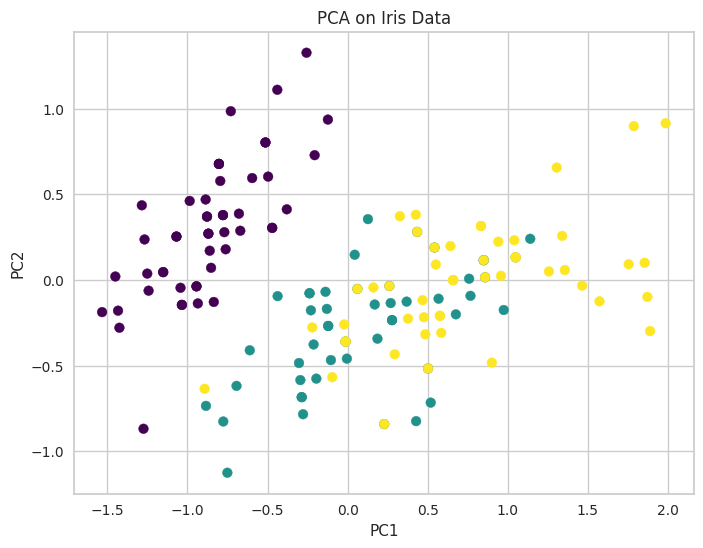

In [28]:
# Run PCA on the first two components of the Iris dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

# plot the results
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA on Iris Data')


In [30]:
X

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Text(0.5, 1.0, 'PCA on Iris Data')

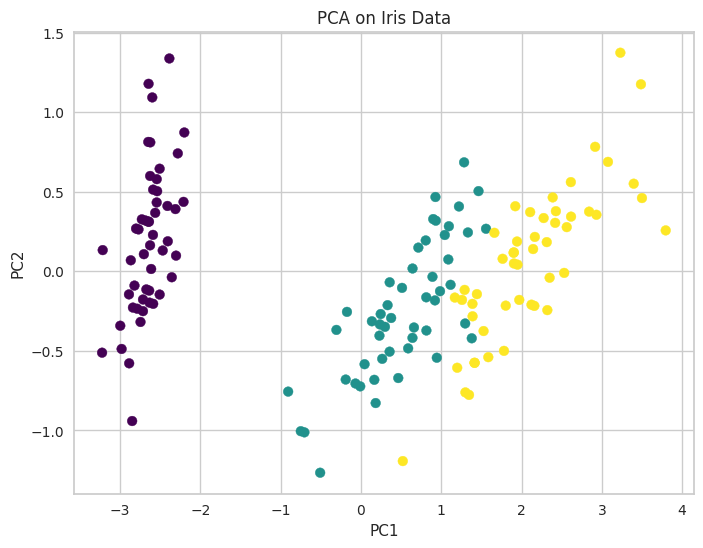

In [31]:
# Run PCA on all of the Iris dataset
pca = PCA()

X_all = (dataset
     ['data']
     #.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
)
pca.fit(X_all)
X_pca = pca.transform(X_all)

# Plot to first 2 components
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA on Iris Data')

## Components of PCA

When we run PCA, we get back the following:

- Principal components (PCs): The PCs are the linear combinations of the features. 
- Explained variance ratio: The explained variance ratio tells us how much variance is explained by each PC.
- Feature weights: The feature weights tell us how much each feature contributes to each PC.


In [32]:
# tell sklearn to output pandas dataframes
sklearn.set_config(transform_output='pandas')

pca.transform(X_all)

,pca0,pca1,pca2,pca3
0,-2.684126,0.319397,-0.027915,0.002262
1,-2.714142,-0.177001,-0.210464,0.099027
2,-2.888991,-0.144949,0.017900,0.019968
3,-2.745343,-0.318299,0.031559,-0.075576
4,-2.728717,0.326755,0.090079,-0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,0.426196
146,1.527167,-0.375317,-0.121898,0.254367
147,1.764346,0.078859,0.130482,0.137001
148,1.900942,0.116628,0.723252,0.044595


In [33]:
# I don't like the column names, so I'll rename them
# change pca0 to PC1, pca1 to PC2, etc

def rename_pc0_to_PC1(col):
    num = int(col[3:]) + 1
    return 'PC' + str(num)

pca.transform(X_all).rename(columns=rename_pc0_to_PC1)


,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,0.002262
1,-2.714142,-0.177001,-0.210464,0.099027
2,-2.888991,-0.144949,0.017900,0.019968
3,-2.745343,-0.318299,0.031559,-0.075576
4,-2.728717,0.326755,0.090079,-0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,0.426196
146,1.527167,-0.375317,-0.121898,0.254367
147,1.764346,0.078859,0.130482,0.137001
148,1.900942,0.116628,0.723252,0.044595


Text(0.5, 1.0, 'Scree Plot')

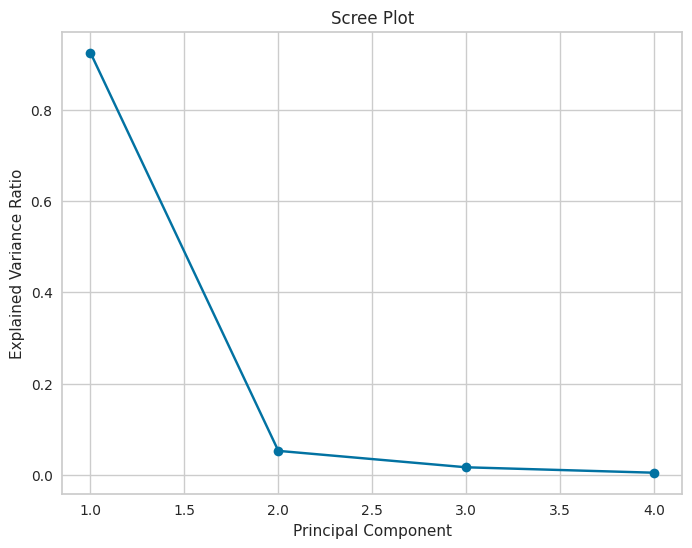

In [34]:
# Scree plot of explained variance
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Scree Plot')

In [35]:
# The explained variance ratio is the percentage of variance explained by each of the selected components.
# The first principal component explains 92.5% of the variance in the data, and 
# the second principal component explains 5.3% of the variance in the data.
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [36]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

## Weights

For every PC, we get a set of weights for each feature. The weights tell us how much each feature contributes to the PC.

In [37]:
# convert components to a dataframe
import pandas as pd

components = pd.DataFrame(pca.components_, columns=X_all.columns,
                          index=['PC1', 'PC2', 'PC3', 'PC4'])
                          
components


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PC1,0.361387,-0.084523,0.856671,0.358289
PC2,0.656589,0.730161,-0.173373,-0.075481
PC3,-0.582030,0.597911,0.076236,0.545831
PC4,0.315487,-0.319723,-0.479839,0.753657


In [38]:
# Centered data - for next cell's calculation
X_all - X_all.mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [39]:
# calculating PC1 by hand for first row - linear combination of 
# centered variables and the first component 
-.743333 * .3613 + 0.4426 * -0.0845 + -2.358 * 0.8566 + -0.9993 * 0.3582

-2.6837779729

In [40]:
pca.transform(X_all).rename(columns=rename_pc0_to_PC1)

,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,0.002262
1,-2.714142,-0.177001,-0.210464,0.099027
2,-2.888991,-0.144949,0.017900,0.019968
3,-2.745343,-0.318299,0.031559,-0.075576
4,-2.728717,0.326755,0.090079,-0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,0.426196
146,1.527167,-0.375317,-0.121898,0.254367
147,1.764346,0.078859,0.130482,0.137001
148,1.900942,0.116628,0.723252,0.044595


In [41]:
# Manually calculating PCA with numpy
import numpy as np
nums = X_all - X_all.mean()
vals, vecs = np.linalg.eig(nums.cov())
idxs = pd.Series(vals).argsort()

explained_variance = pd.Series(sorted(vals, reverse=True))

def set_columns(df_):
    df_.columns = [f'PC{i+1}' for i in range(len(df_.columns))]
    return df_

comps = (pd.DataFrame(vecs, index=nums.columns)
 .iloc[:, idxs[::-1]]
 .pipe(set_columns)
)

pcas = (nums.dot(comps))
pcas

,PC1,PC2,PC3,PC4
0,-2.684126,-0.319397,-0.027915,0.002262
1,-2.714142,0.177001,-0.210464,0.099027
2,-2.888991,0.144949,0.017900,0.019968
3,-2.745343,0.318299,0.031559,-0.075576
4,-2.728717,-0.326755,0.090079,-0.061259
...,...,...,...,...
145,1.944110,-0.187532,0.177825,0.426196
146,1.527167,0.375317,-0.121898,0.254367
147,1.764346,-0.078859,0.130482,0.137001
148,1.900942,-0.116628,0.723252,0.044595


## Scatter Plot

In [42]:
# # Use plotly to plot the first three components
# import plotly.express as px
# fig = px.scatter_3d(pcas, x='PC1', y='PC2', z='PC3', color=y)
# fig.show()

import plotly.io as pio
pio.renderers.default = 'browser'
fig.show()


/var/folders/p0/l0f81wr95lqgtrh7g618gzbw0000gn/T/ipykernel_51788/799408600.py:8: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



## Other Dimensionality Reduction Techniques

- t-SNE - t-distributed stochastic neighbor embedding. Tries to preserve the local structure of the data.
- UMAP - Uniform Manifold Approximation and Projection. Tries to preserve the both global and structure of the data.
- Autoencoders


In [43]:
# run t-SNE on the Iris dataset
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_all)


In [44]:
X_tsne

,tsne0,tsne1,tsne2
0,-9.350981,4.518563,0.872460
1,-9.642999,3.484115,2.794677
2,-10.252443,3.113678,2.069078
3,-9.774651,2.397591,2.348674
4,-9.440605,4.133817,0.441308
...,...,...,...
145,5.947095,-1.481807,-1.168066
146,3.601076,-2.441802,0.166578
147,5.137642,-1.752049,-0.801270
148,6.469763,-1.872679,-0.032888


In [45]:
# plot results with plotly
import plotly.express as px
fig = px.scatter_3d(X_tsne, x='tsne0', y='tsne1', z='tsne2', color=y)
fig.show()


In [46]:
!pip install umap-learn

In [48]:
# run UMAP
import umap
reducer = umap.UMAP(random_state=42, n_components=3)
X_umap = pd.DataFrame(reducer.fit_transform(X_all), columns=['umap0', 'umap1', 'umap2'])
X_umap

/Users/alexparsee/.pyenv/versions/3.11.4/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



,umap0,umap1,umap2
0,15.379992,9.674418,3.074468
1,13.739589,9.859799,2.462796
2,14.200184,9.352180,2.052944
3,13.887722,9.502365,1.914205
4,15.540643,9.444521,2.783031
...,...,...,...
145,-1.774666,4.034769,5.779071
146,-0.271343,4.009351,8.082716
147,-1.609775,4.131473,6.250140
148,-2.322194,3.915279,5.901130


In [49]:
# plot results with plotly
import plotly.express as px
fig = px.scatter_3d(X_umap, x='umap0', y='umap1', z='umap2', color=y)
fig.show()

## Challenge: PCA

Run PCA on the numeric columns of the Titanic data. Plot the result of the first three dimensons using plotly.

Solution: PCA

# Linear Regression

## Linear Regression Algorithm

Linear regression calculates an intercept and slope (weights) for a line that minimizes the sum of squared errors between the line and the data points.

The formula for linear regression is as follows:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$

where $y$ is the target variable, $\beta_0$ is the intercept, $\beta_1$ to $\beta_n$ are the weights, and $x_1$ to $x_n$ are the features.

The algorithm is as follows:

- Initialize the weights.
- Calculate the predicted values.
- Calculate the error.
- Update the weights.
- Repeat the steps above until convergence.



In [50]:
# Load anscombe's quartet
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
anscombe = (pd.DataFrame({'x': x, 'y1': y1, 'y2': y2, 'y3': y3, 'x4': x4, 'y4': y4})
            )

anscombe

,x,y1,y2,y3,x4,y4
0,10,8.04,9.14,7.46,8,6.58
1,8,6.95,8.14,6.77,8,5.76
2,13,7.58,8.74,12.74,8,7.71
3,9,8.81,8.77,7.11,8,8.84
4,11,8.33,9.26,7.81,8,8.47
5,14,9.96,8.10,8.84,8,7.04
6,6,7.24,6.13,6.08,8,5.25
7,4,4.26,3.10,5.39,19,12.50
8,12,10.84,9.13,8.15,8,5.56
9,7,4.82,7.26,6.42,8,7.91


<Axes: xlabel='x', ylabel='y1'>

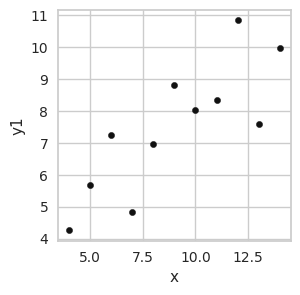

In [51]:
# plot x y1
fig, ax = plt.subplots(figsize=(3, 3))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')

Let's run the algorithm on x and y1

Calculate the slope:

$$\beta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

Calculate the intercept:

$$\beta_0 = \bar{y} - \beta_1 \bar{x}$$

Model Equation:

$$y = \beta_0 + \beta_1 x$$

In [52]:
# slope

x1 = anscombe['x']
y1 = anscombe['y1']
slope = ((x1 - x1.mean())*(y1 - y1.mean())).sum() / ((x1 - x1.mean())**2).sum()
slope

0.5000909090909091

In [53]:
# intercept

intercept = y1.mean() - slope * x1.mean()
intercept

3.0000909090909103

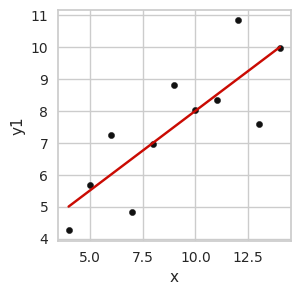

In [55]:
# plot x y1
fig, ax = plt.subplots(figsize=(3, 3))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')
# plot the line
x1 = np.linspace(4, 14, 100)
y1 = slope * x1 + intercept
ax.plot(x1, y1, color='r')

## Examples with Scikit-learn

In [56]:
from sklearn.linear_model import LinearRegression

x1 = anscombe[['x']]
y1 = anscombe['y1']
y2 = anscombe['y2']
y3 = anscombe['y3']

lr1 = LinearRegression()
lr1.fit(x1, y1)



LinearRegression()

In [57]:
lr1.coef_

array([0.50009091])

In [58]:
lr1.intercept_

3.0000909090909094

In [59]:
lr2 = LinearRegression()
lr2.fit(x1, y2)
lr3 = LinearRegression()
lr3.fit(x1, y3)

LinearRegression()

(3.0, 13.0)

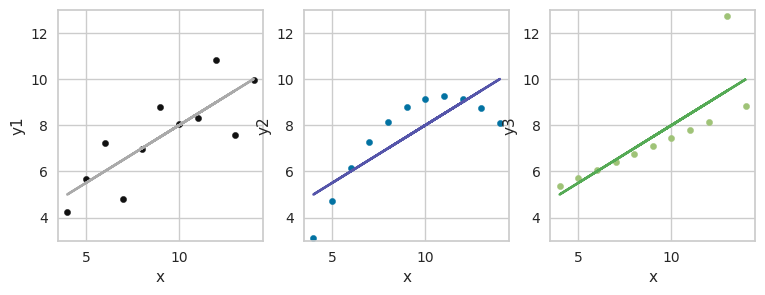

In [60]:
# plot 1, 2 and 3 in different colors
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
anscombe.plot.scatter(x='x', y='y1', ax=axs[0], color='k')
axs[0].plot(x1, lr1.predict(x1), color='#aaa')
axs[0].set_ylim(3, 13)
anscombe.plot.scatter(x='x', y='y2', ax=axs[1], color='b')
axs[1].plot(x1, lr2.predict(x1), color='#55a')
axs[1].set_ylim(3, 13)
anscombe.plot.scatter(x='x', y='y3', ax=axs[2], color='g')
axs[2].plot(x1, lr3.predict(x1), color='#5a5')
axs[2].set_ylim(3, 13)

## Real world example with Aircraft Elevators

From website: This data set is also obtained from the task of controlling a F16 aircraft, although the target variable and attributes are different from the ailerons domain. In this case the goal variable is related to an action taken on the elevators of the aircraft.


In [61]:
# https://www.openml.org/search?type=data&sort=runs&id=216&satatus=active 
from datasets import load_dataset
elevators = load_dataset('inria-soda/tabular-benchmark', data_files='reg_num/elevators.csv')

Generating train split: 16599 examples [00:00, 368317.69 examples/s]


In [62]:
elev = elevators['train'].to_pandas()
elev


,climbRate,Sgz,p,q,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime3,Sa,Goal
0,118.0,-55.0,-0.28,-0.08,-0.2,-11.0,11.0,0.005,-0.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,-0.0010,0.031
1,390.0,-45.0,-0.06,-0.07,-0.6,-12.0,11.0,0.010,-0.2,-0.0008,-0.0008,-0.0008,-0.0008,0.0000,0.0,-0.0008,0.034
2,68.0,6.0,0.11,0.15,0.6,-10.0,-9.0,-0.003,-0.2,-0.0011,-0.0010,-0.0010,-0.0010,-0.0002,0.0,-0.0010,0.033
3,-358.0,-12.0,-0.20,0.13,-0.3,-11.0,-7.0,0.001,-0.1,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,-0.0010,0.032
4,-411.0,-19.0,-0.18,0.02,-0.5,-11.0,-3.0,0.002,1.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,-0.0010,0.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16594,299.0,-28.0,0.08,-0.12,-0.3,-9.0,15.0,0.010,-0.2,-0.0005,-0.0005,-0.0005,-0.0005,0.0000,0.0,-0.0005,0.027
16595,84.0,0.0,0.14,0.14,1.1,-8.0,-11.0,-0.014,-0.6,-0.0009,-0.0009,-0.0009,-0.0009,0.0000,0.0,-0.0009,0.026
16596,-208.0,-6.0,-0.48,0.09,0.2,-9.0,-7.0,-0.010,-0.1,-0.0009,-0.0009,-0.0009,-0.0009,0.0000,0.0,-0.0009,0.023
16597,-146.0,-14.0,-0.38,-0.03,-0.8,-10.0,10.0,0.010,-1.0,-0.0005,-0.0005,-0.0005,-0.0005,0.0000,0.0,-0.0005,0.022


In [63]:
X = elev.drop(columns=['Goal'])
y = elev['Goal']

lr_elev = LinearRegression()
lr_elev.fit(X, y)

LinearRegression()

In [64]:
lr_elev.coef_


array([ 3.27106569e-06,  5.61529798e-06,  3.74004651e-03,  8.61939078e-04,
        2.58585645e-07,  1.64094801e-03, -6.34098825e-05,  5.36145023e-01,
       -1.13260740e-04, -5.64354233e+00, -1.61724342e+01,  1.25585077e+01,
       -6.89690670e+00,  2.49509111e+00,  4.87181641e+00, -1.33860695e+01])

In [65]:
lr_elev.intercept_

0.01768750384807033

<Axes: >

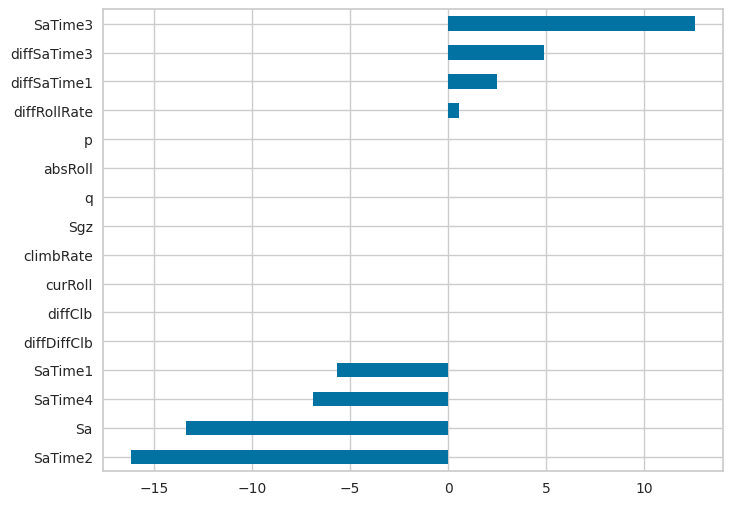

In [66]:
pd.Series(lr_elev.coef_, index=X.columns).sort_values().plot.barh(figsize=(8, 6))

In [67]:
# score is R^2 - the proportion of variance explained by the model
lr_elev.score(X, y)

0.8134729462382582

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y, lr_elev.predict(X)), mean_squared_error(y, lr_elev.predict(X))

(0.00198829381330362, 8.41542198511219e-06)

In [69]:
lr_elev.predict(X.iloc[[0]])

array([0.03014431])

In [70]:
y.iloc[0]

0.031

## Assumptions of Linear Regression

- Linear relationship between the features and target variable
- No multicollinearity - no correlation between the features
- Homoscedasticity - the variance of the residuals is the same for all values of the target variable
- No outliers - the residuals are normally distributed

Also, generally you will want to scale the features before running linear regression.

In [71]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

,climbRate,Sgz,p,q,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime3,Sa
0,0.467589,-1.658915,-0.869468,-1.160772,-0.259432,-0.051279,1.094770,0.480597,-0.174873,-0.619961,-0.603380,-0.603268,-0.593311,0.107069,0.058624,-0.593078
1,1.447468,-1.265819,-0.160813,-1.074463,-0.679745,-0.295029,1.094770,0.877847,-0.174873,-0.123040,-0.112520,-0.112463,-0.105913,0.107069,0.058624,-0.105799
2,0.287464,0.738974,0.386783,0.824339,0.581193,0.192472,-0.797693,-0.155004,-0.174873,-0.868422,-0.603380,-0.603268,-0.593311,-2.210070,0.058624,-0.593078
3,-1.247200,0.031400,-0.611775,0.651720,-0.364510,-0.051279,-0.608447,0.162796,-0.069542,-0.619961,-0.603380,-0.603268,-0.593311,0.107069,0.058624,-0.593078
4,-1.438132,-0.243768,-0.547352,-0.297681,-0.574667,-0.051279,-0.229954,0.242246,1.299763,-0.619961,-0.603380,-0.603268,-0.593311,0.107069,0.058624,-0.593078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16594,1.119641,-0.597554,0.290149,-1.506009,-0.364510,0.436222,1.473263,0.877847,-0.174873,0.622341,0.623769,0.623744,0.625185,0.107069,0.058624,0.625120
16595,0.345104,0.503116,0.483418,0.738030,1.106585,0.679972,-0.986939,-1.028955,-0.596197,-0.371501,-0.357950,-0.357865,-0.349612,0.107069,0.058624,-0.349438
16596,-0.706825,0.267258,-1.513699,0.306484,0.160881,0.436222,-0.608447,-0.711155,-0.069542,-0.371501,-0.357950,-0.357865,-0.349612,0.107069,0.058624,-0.349438
16597,-0.483470,-0.047219,-1.191583,-0.729227,-0.889902,0.192472,1.000147,0.877847,-1.017522,0.622341,0.623769,0.623744,0.625185,0.107069,0.058624,0.625120


In [72]:
X_scaled.describe()

,climbRate,Sgz,p,q,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime3,Sa
count,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04,1.659900e+04
mean,-1.744359e-17,-3.082058e-17,4.815715e-18,-3.831169e-17,2.889429e-18,-6.164116e-17,8.989335e-18,1.519626e-17,-1.819270e-18,7.084452e-17,-8.561272e-17,4.280636e-17,-2.910832e-17,-3.189074e-17,-2.520893e-17,-9.738446e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-3.534785e+00,-3.388540e+00,-4.380528e+00,-4.354212e+00,-3.201622e+00,-2.976284e+00,-5.244982e+00,-6.590462e+00,-8.706692e+00,-6.831474e+00,-6.739124e+00,-6.738325e+00,-6.442092e+00,-8.002919e+00,-1.027523e+01,-6.440423e+00
25%,-6.780051e-01,-6.368641e-01,-7.084098e-01,-7.292265e-01,-6.797451e-01,-5.387796e-01,-7.030697e-01,-6.317047e-01,-1.748729e-01,-3.715008e-01,-3.579499e-01,-3.578654e-01,-5.933112e-01,1.070695e-01,5.862429e-02,-5.930775e-01
50%,-6.918317e-02,-7.909767e-03,3.245607e-02,-3.875308e-02,5.580243e-02,1.924716e-01,5.391565e-02,3.896161e-03,-6.954175e-02,1.254202e-01,1.329097e-01,1.329392e-01,1.377864e-01,1.070695e-01,5.862429e-02,1.378407e-01
75%,6.801361e-01,6.210446e-01,7.411104e-01,6.517204e-01,6.862717e-01,9.237228e-01,6.216546e-01,6.394970e-01,1.411205e-01,6.223413e-01,6.237693e-01,6.237438e-01,6.251849e-01,1.070695e-01,5.862429e-02,6.251195e-01
max,3.547723e+00,4.198223e+00,3.543516e+00,5.485035e+00,2.997992e+00,1.898724e+00,4.311958e+00,4.532552e+00,8.988933e+00,1.864644e+00,1.850918e+00,1.850755e+00,1.843681e+00,8.217058e+00,8.670170e+00,1.843317e+00


In [73]:
lr_std = LinearRegression()
lr_std.fit(X_scaled, y)
lr_std.score(X_scaled, y)

0.8134729462382582

<Axes: >

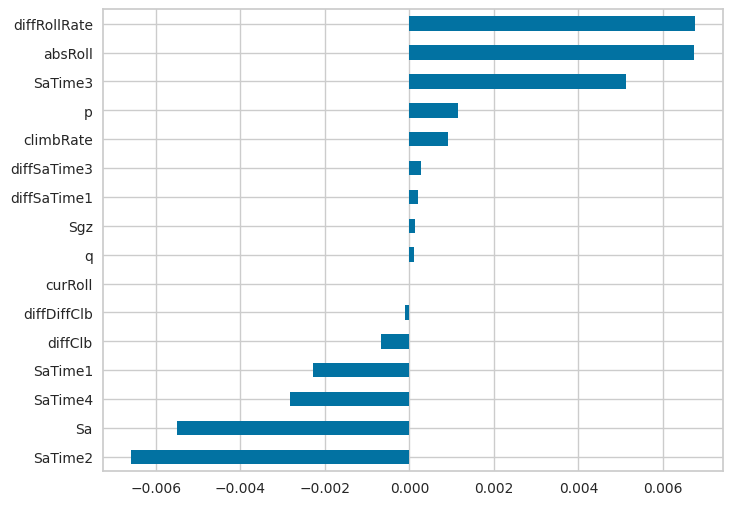

In [74]:
pd.Series(lr_std.coef_, index=X.columns).sort_values().plot.barh(figsize=(8, 6))

In [75]:
!pip install xgboost

  Using cached xgboost-2.1.1-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-macosx_12_0_arm64.whl (1.9 MB)


In [76]:
# try with XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X, y)
xgb.score(X, y)

0.9542744875539696

## Challenge: Linear Regression

Make a model to predict how much Titanic passengers paid for their tickets with Linear Regression. (Only use the numeric columns for the model.)

## Solution: Linear Regression

# Logistic Regression



## Logistic Regression Algorithm

Even though logistic regression has "regression" in its name, it is used as a classification algorithm. It calculates the probability that a sample belongs to a class. Rather than fitting a line to the data, it fits an "S" shaped curve called the sigmoid function.

The formula for logistic regression is as follows:

$$y = \frac{1}{1 + e^{-z}}$$

where $y$ is the probability that a sample belongs to a class and $z$ is the linear combination of the features.

The algorithm is as follows:

- Initialize the weights.
- Calculate the predicted values.
- Calculate the error.
- Update the weights.
- Repeat the steps above until convergence.


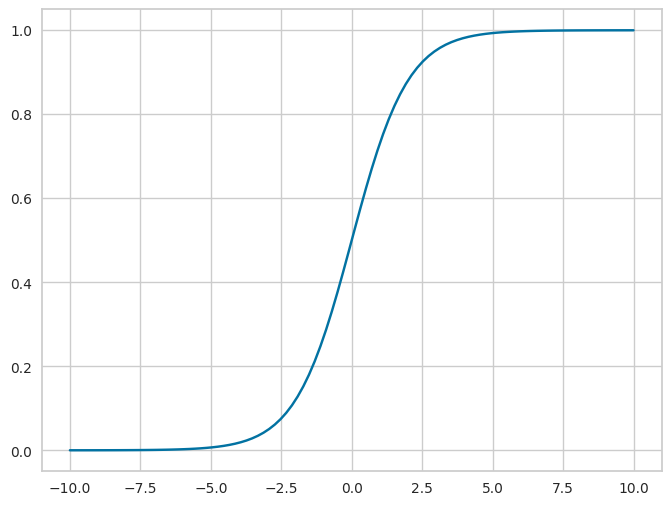

In [77]:
# plot sigmoid function
import numpy as np 
from matplotlib import pyplot as plt
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)

## Basic Example





/Users/alexparsee/.pyenv/versions/3.11.4/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



<Axes: xlabel='x', ylabel='y'>

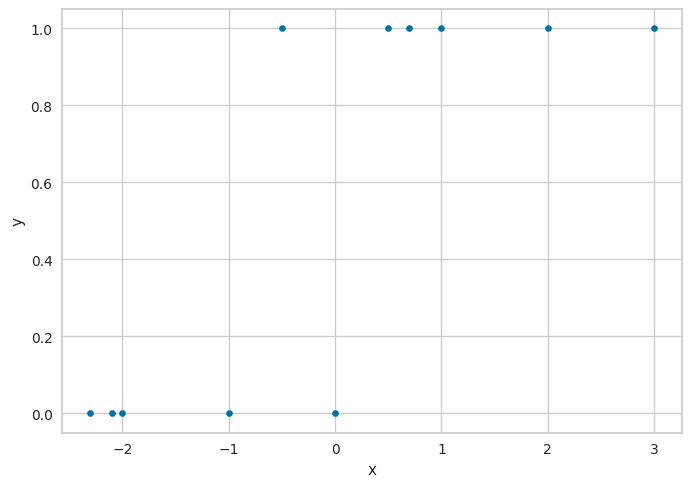

In [78]:
import pandas as pd
log_data = pd.DataFrame({'x': [-2, -2.3, -2.1, -1, -.5,  0, .5, .7, 1, 2, 3],
                    'y': [0, 0, 0, 0, 1, 0, 1,1, 1, 1, 1]})

log_data.plot.scatter(x='x', y='y')

In [79]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(log_data[['x']], log_data['y'])


LogisticRegression()

In [80]:
log_r.coef_

array([[1.24748205]])

In [81]:
log_r.intercept_

array([0.455222])

/Users/alexparsee/.pyenv/versions/3.11.4/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



Text(2, 0.4, 'Predict 1\nright of this')

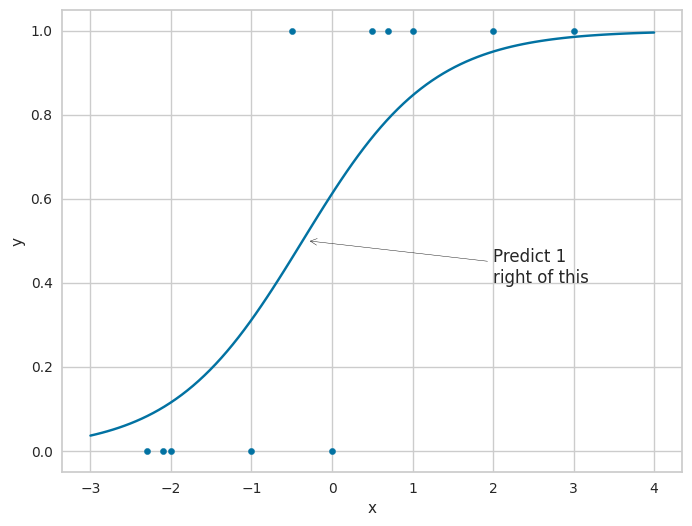

In [82]:
# plot fitted sigmoid function on top of data
x = np.linspace(-3, 4, 100)
y = 1 / (1 + np.exp(-(log_r.coef_[0][0] * x + log_r.intercept_[0])))
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)
log_data.plot.scatter(x='x', y='y', ax=ax)
# annotate above .5
ax.annotate('Predict 1\nright of this', xy=(-.31, .5), xytext=(2, .4), arrowprops={'arrowstyle': '->'})

In [83]:
log_r.predict([[-.3]])

/Users/alexparsee/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([1])

## Real World Example with Eye movements

From the website:

The dataset consist of several assignments. Each assignment consists of a question followed by ten sentences (titles of news articles). One of the sentences is the correct answer to the question (C) and five of the sentences are irrelevant to the question (I). Four of the sentences are relevant to the question (R), but they do not answer it.

- Features are in columns, feature vectors in rows.
- Each assignment is a time sequence of 22-dimensional feature vectors.
- The first column is the line number, second the assignment number and the next 22 columns (3 to 24) are the different features. Columns 25 to 27 contain extra information about the example. The training data set contains the classification label in the 28th column: "0" for irrelevant, "1" for relevant and "2" for the correct answer.
- Each example (row) represents a single word. You are asked to return the classification of each read sentence.
- The 22 features provided are commonly used in psychological studies on eye movement. All of them are not necessarily relevant in this context.

The objective of the Challenge is to predict the classification labels (I, R, C).


In [84]:
# https://www.openml.org/da/1044
from datasets import load_dataset
eye = load_dataset('inria-soda/tabular-benchmark', data_files='clf_num/eye_movements.csv')

Generating train split: 7608 examples [00:00, 271706.22 examples/s]


In [85]:
eye_df = eye['train'].to_pandas()
eye_df


,lineNo,assgNo,prevFixDur,firstfixDur,firstPassFixDur,nextFixDur,firstSaccLen,lastSaccLen,prevFixPos,landingPos,...,totalFixDur,meanFixDur,regressLen,regressDur,pupilDiamMax,pupilDiamLag,timePrtctg,titleNo,wordNo,label
0,9684.0,298.0,99.0,119.0,119.0,238.0,300.1666,288.0156,246.0732,56.6326,...,119.0,119.0000,0.0,0.0,0.1541,0.4446,0.0176,4,3,0
1,2065.0,66.0,119.0,159.0,239.0,100.0,306.1066,117.2359,321.0140,47.3207,...,239.0,119.5000,0.0,159.0,0.0119,0.3264,0.0239,8,1,0
2,1969.0,61.0,139.0,139.0,357.0,179.0,590.5294,805.0531,479.3078,112.3610,...,536.0,178.6667,258.0,0.0,0.0874,0.0859,0.0431,4,8,0
3,10326.0,315.0,199.0,139.0,219.0,99.0,80.9475,306.5587,153.1698,79.8389,...,198.0,99.0000,0.0,396.0,0.0173,0.1453,0.0264,4,2,0
4,6827.0,204.0,80.0,100.0,239.0,139.0,110.7576,161.4845,189.6207,96.7471,...,139.0,139.0000,0.0,378.0,0.3229,0.4074,0.0288,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,10923.0,336.0,219.0,219.0,219.0,119.0,277.4140,27.8568,281.0640,18.6078,...,219.0,219.0000,417.0,139.0,0.2830,0.4085,0.0187,9,4,1
7604,10924.0,336.0,219.0,119.0,278.0,139.0,27.8568,69.0290,111.3643,84.8528,...,278.0,139.0000,0.0,278.0,0.2830,0.4730,0.0237,9,3,1
7605,10925.0,336.0,219.0,219.0,219.0,119.0,69.0290,165.0273,55.7136,30.3026,...,139.0,139.0000,417.0,139.0,0.2830,0.4730,0.0119,9,4,1
7606,10926.0,336.0,139.0,179.0,179.0,80.0,165.0273,1445.4747,122.5887,38.3471,...,179.0,179.0000,0.0,0.0,0.2230,0.4730,0.0153,9,5,1


In [86]:
from sklearn.preprocessing import StandardScaler

X = eye_df.drop(columns=['label'])
y = eye_df['label']
std = StandardScaler()
X_scaled = std.fit_transform(X)
eye_log = LogisticRegression()
eye_log.fit(X_scaled, y)
eye_log.score(X_scaled, y)

0.5638801261829653

<Axes: >

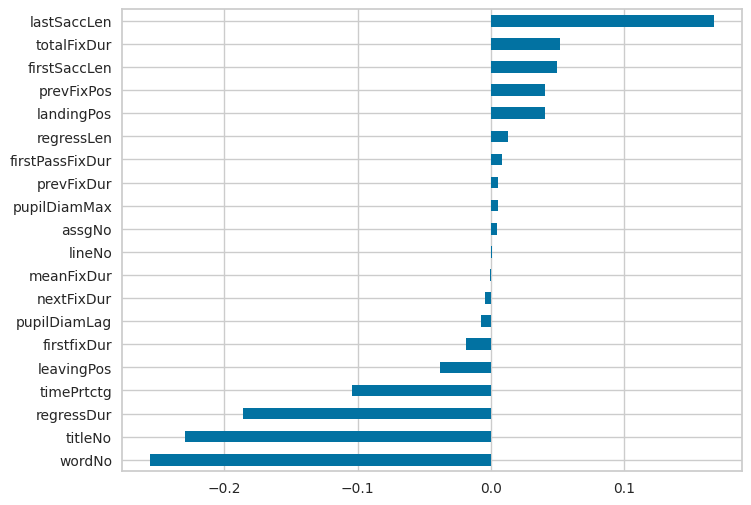

In [87]:
pd.Series(eye_log.coef_[0], index=X.columns).sort_values().plot.barh(figsize=(8, 6))

## Challenge: Logistic Regression

Create a logistic regression model to predict whether a Titanic passenger survives based on the numeric columns.


## Solution: Logistic Regression

# Decision Trees


## Decision Tree Algorithm

Decision trees are a type of supervised learning algorithm that can be used for both classification and regression. They work by splitting the data into subsets based on the features. The goal is to split the data in a way that minimizes the entropy of the subsets.

In [88]:
## Create "decision stump"
## fit tree regressor to anscombe's quartet limit to 1 level

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=1)
X = anscombe[['x']]
y = anscombe['y1']
dt.fit(X, y)


DecisionTreeRegressor(max_depth=1)

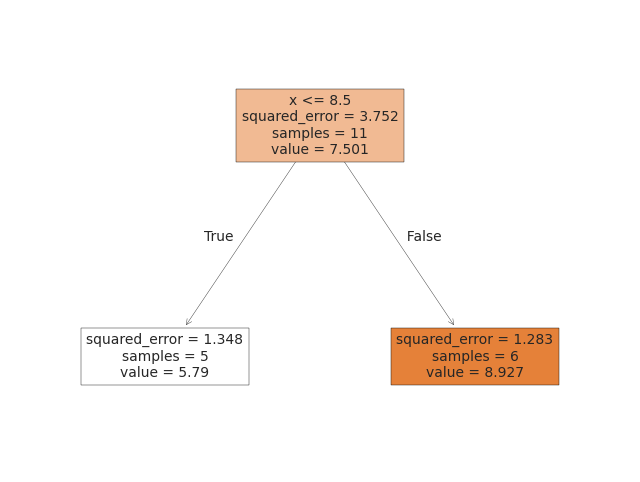

In [89]:
## Plot the tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(dt, ax=ax, feature_names=['x'], filled=True, fontsize=10)

/Users/alexparsee/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



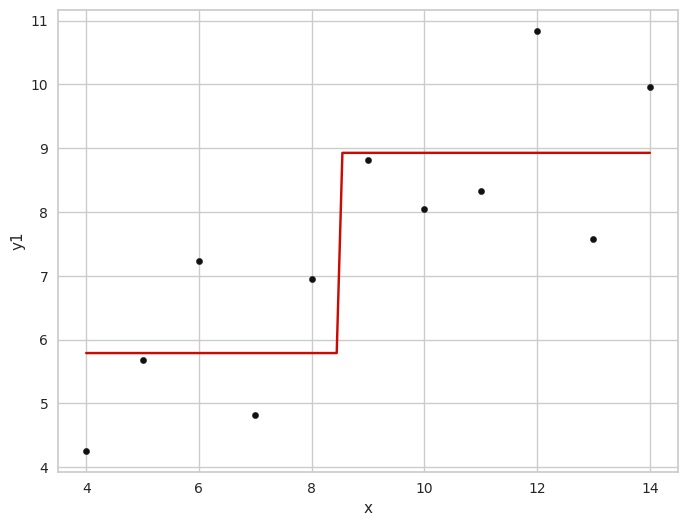

In [90]:
## Plot the data and predictions on the same plot
import numpy as np
fig, ax = plt.subplots(figsize=(8, 6))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')
# plot the line
x1 = np.linspace(4, 14, 100)
y1 = dt.predict(x1.reshape(-1, 1))
ax.plot(x1, y1, color='r')


/Users/alexparsee/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



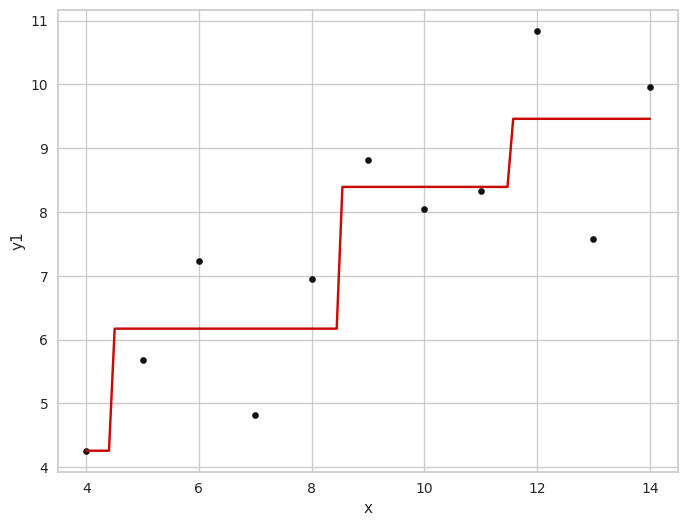

In [91]:
## Now plot to two levels
fig, ax = plt.subplots(figsize=(8, 6))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')
# plot the line
dt2 = DecisionTreeRegressor(max_depth=2)
dt2.fit(X, y)

x1 = np.linspace(4, 14, 100)
y1 = dt2.predict(x1.reshape(-1, 1))
ax.plot(x1, y1, color='r')


/Users/alexparsee/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



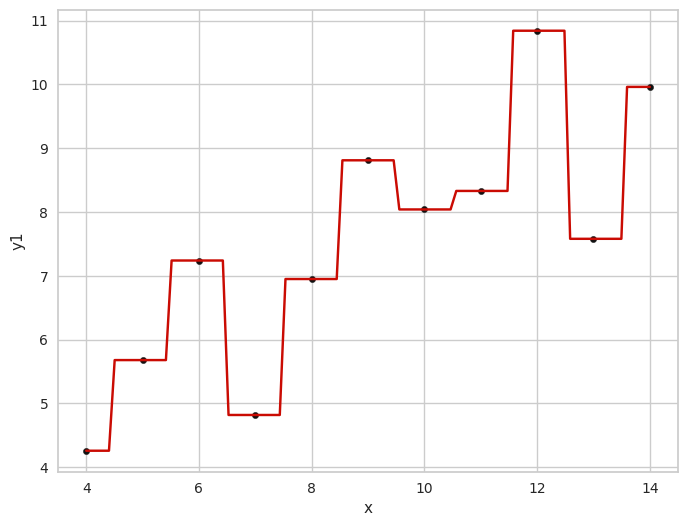

In [92]:
## Now plot unlimited levels
fig, ax = plt.subplots(figsize=(8, 6))
anscombe.plot.scatter(x='x', y='y1', ax=ax, color='k')
# plot the line
dt3 = DecisionTreeRegressor(max_depth=None)
dt3.fit(X, y)

x1 = np.linspace(4, 14, 100)
y1 = dt3.predict(x1.reshape(-1, 1))
ax.plot(x1, y1, color='r')


## Real World with Aircraft Elevators

In [93]:
X_elev = elev.drop(columns=['Goal'])
y_elev = elev['Goal']
dt_elev = DecisionTreeRegressor(max_depth=3)
dt_elev.fit(X_elev, y_elev)


DecisionTreeRegressor(max_depth=3)

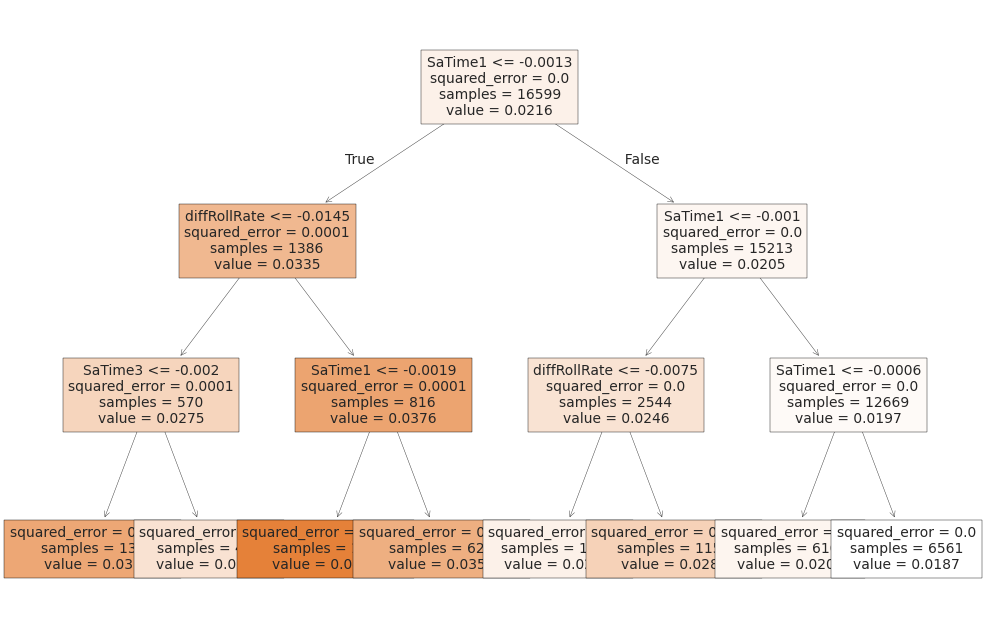

In [94]:
# plot the tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 8))
_ = plot_tree(dt_elev, ax=ax, feature_names=X_elev.columns, filled=True, fontsize=10, precision=4)


In [95]:
dt_elev.score(X_elev, y_elev)

0.48738100110114524

In [96]:
from sklearn.linear_model import LinearRegression
lr_elev = LinearRegression()
lr_elev.fit(X_elev, y_elev)
lr_elev.score(X_elev, y_elev)

0.8134729462382582

<Axes: >

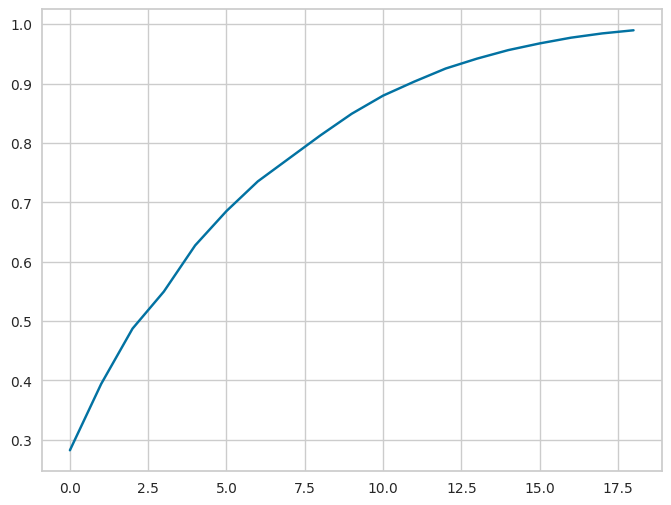

In [97]:
# loop over depths and plot the results
scores = []
for i in range(1, 20):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_elev, y_elev)
    scores.append(dt.score(X_elev, y_elev))

pd.Series(scores).plot.line(figsize=(8, 6))

Text(0.5, 1.0, 'Validation Curve for Decision Tree')

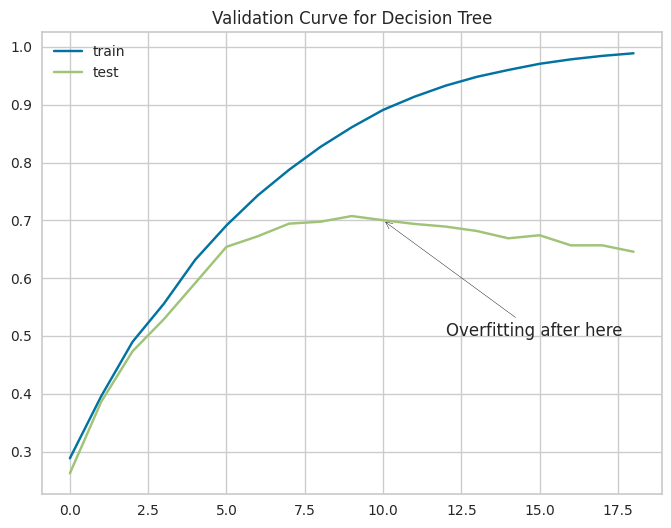

In [98]:
# split the data and plot results of train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_elev, y_elev, random_state=42)
test_scores = []
train_scores = []
for i in range(1, 20):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    test_scores.append(dt.score(X_test, y_test))
    train_scores.append(dt.score(X_train, y_train))

ax = pd.DataFrame({'train': train_scores, 'test': test_scores}).plot.line(figsize=(8, 6))

# annotate overfitting at 10, .7
ax.annotate('Overfitting after here', xy=(10, .7), xytext=(12, .5), arrowprops={'arrowstyle': '->'})

# set title
ax.set_title('Validation Curve for Decision Tree')


In [99]:
# Let's see if our model improves with a deeper tree
dt_elev = DecisionTreeRegressor(max_depth=11)
dt_elev.fit(X_train, y_train)
dt_elev.score(X_test, y_test)

0.6970035108659475

In [100]:
lr_elev = LinearRegression()
lr_elev.fit(X_train, y_train)
lr_elev.score(X_test, y_test)

0.8174575653756876

## Random Forests and XGBoost

In [101]:
# create a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.5293129811445909

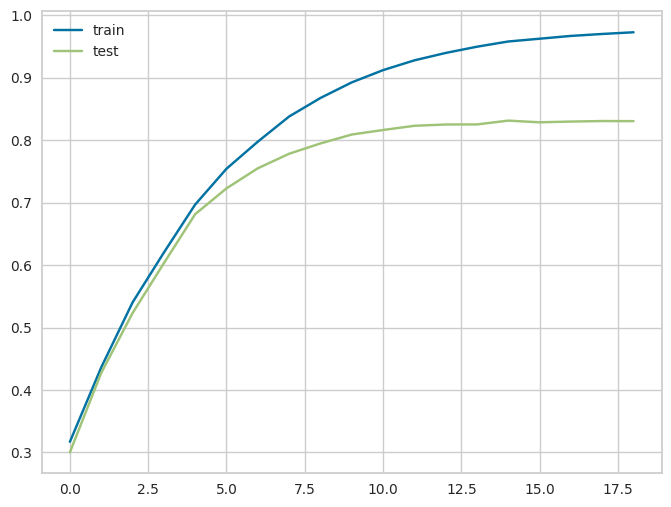

In [102]:
# sweep over depths and plot results
test_scores = []
train_scores = []
for i in range(1, 20):
    rf = RandomForestRegressor(n_estimators=100, max_depth=i)
    rf.fit(X_train, y_train)
    test_scores.append(rf.score(X_test, y_test))
    train_scores.append(rf.score(X_train, y_train))

ax = pd.DataFrame({'train': train_scores, 'test': test_scores}).plot.line(figsize=(8, 6))

In [103]:
# create a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=13, random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.8269852233004588

In [104]:
# create an xgb regressor
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.8764783616363858

## Challenge: Decision Trees

Create a decision tree to predict survival on the titanic. See if you can determine the optimal depth of the tree.

## Solution: Decision Trees

# Conclusion - Next Steps

- Practice, practice, practice! - I recommend using your own data to practice.
- Check out my Feature Engineering course.
- Check out my XGBoost course.